# Câu 01

## 1.1. Đề bài

1. Phân biệt giữa Zero-shot, One-shot và Few-shot Prompting. Khi nào nên dùng từng kỹ thuật?
2. Hãy mô tả chi tiết về Chain-of-thought Prompting.
3. System Prompt là gì và nó khác gì so với User Prompt và Assistant Prompt trong kiến trúc hoạt động của LLM?
4. Hãy phân tích một ví dụ System Prompt tốt và một ví dụ System Prompt kém, giải thích lý do và sự khác biệt về chất lượng đầu ra của mô hình.
5. Các tham số khi gọi mô hình ngôn ngữ (như Temperature, Max length, Context Window,…) ảnh hưởng thế nào đến kết quả sinh văn bản?

## 1.2. Bài làm

### a) Phân biệt giữa Zero-shot, One-shot và Few-shot Prompting

|Khác biệt | Zero-shot| One-shot| Few-shot Prompting|
|-|-|-|-|
|Số lượng ví dụ|`0`|`1`| $\alpha$ với $\alpha  \in \mathbb{N}, \alpha> 1$|
|Ví dụ sử dụng| Những sự thật hiển nhiên, mặc định LLM có thể tự hiểu (VD: rút trích thông tin tường minh)| Những thông tin cụ thể cần rút trích, có thể cần điều chỉnh định dạng, hoặc một hướng dẫn cơ bản| Dùng trong những trường hợp phức tạp hơn, cần một loạt hướng dẫn cụ thể để LLM có thể nhận ra insight và quy tắc của nhiệm vụ được giao|
|Trade-off| Tốn ít tokens, nhưng độ chính xác có thể không cao| Cân bằng giữa tối ưu hóa tokens và độ chính xác| Tốn nhiều tokens hơn, nhưng độ chính xác cũng tối ưu hơn (với điều kiện prompt phù hợp)|

### b) Hãy mô tả chi tiết về Chain-of-thought Prompting

> CoT là một kỹ thuật gợi ý mô hình tạo ra một loạt các bước suy luận trung gian theo hướng dẫn của prompter trước khi đưa ra câu trả lời cuối cùng.

Kỹ thuật `Chain-of-thought` đảm bảo LLM sẽ luôn giải quyết vấn đề theo một hướng xác định do người dùng định nghĩa ban đầu.

**Use cases**: `Chain-of-thought` thường được sử dụng trong các bài toán ưu tiên độ chính xác và tính giải thích được, vì LLM sẽ cần phải tuân theo một trình tự giải quyết vấn đề tường minh mà người dùng đã định sẵn. Nếu người dùng đưa ra một chuỗi suy luận đủ cơ bản và đúng logic, LLM sẽ tăng khả năng giải quyết chính xác vấn đề hơn.

**Trade-off**: Sẽ tốn tokens và tăng latency.

### c) System Prompt là gì và nó khác gì so với User Prompt và Assistant Prompt trong kiến trúc hoạt động của LLM?

> **System Prompt** là một chuỗi văn bản đặc biệt được đưa vào đầu mỗi cuộc trò chuyện với Mô hình Ngôn ngữ Lớn (LLM), tác động tới toàn bộ response của LLM trong cuộc hội thoại đó.
>
> **User Prompt** chuỗi văn bản được người dùng định nghĩa nhằm giải quyết vấn đề cụ thể được đặt ra trong mỗi prompt.
>
> **Assistant Prompt** là phản hồi thực tế mà mô hình LLM đã tạo ra sau khi nhận User Prompt.

**Use Cases**
Chúng ta sẽ phân tích trường hợp cụ thể cho mỗi loại prompt dựa vào đặc tính vị trí mà nó tác động/chịu ảnh hưởng.
|Đặc tính| System Prompt| User Prompt| Assistant Prompt|
|-|-|-|-|
|Vị trí tác động|Toàn bộ cuộc hội thoại| Ngay tại thời điểm người dùng request| Ngay tại thời điểm nhận request từ người dùng và lịch sử trò chuyện lân cận|
|Use cases|Cài đặt vai trò, ngưỡng an toàn, hoặc định dạng câu trả lời| Một yêu cầu cụ thể phù hợp với LLM/Agent| Phản hồi của LLM cho yêu cầu của người dùng dựa vào yêu cầu và lịch sử trò chuyện/session trò chuyện|


### d) Hãy phân tích một ví dụ System Prompt tốt và một ví dụ System Prompt kém, giải thích lý do và sự khác biệt về chất lượng đầu ra của mô hình

Phần lớn các prompt được cho là tốt thường đưa ra các định nghĩa cụ thể, có thể định lượng hoặc cùng được hiểu theo một ý xác định. Ngoài ra, nó còn có những ranh giới, giới hạn có thể bao quát hết cho một mục tiêu sử dụng cụ thể được định nghĩa từ đầu (ví dụ: tutor, interviewer, ...)

**Ví dụ dùng tốt**
```
Bạn là một Chuyên gia Lập trình Hướng đối tượng (OOP) cao cấp, tập trung vào Python.

Mục tiêu: Nhiệm vụ chính của bạn là phân tích yêu cầu, cung cấp các giải pháp thiết kế OOP thanh lịch, rõ ràng và có khả năng bảo trì.

Phong cách: Sử dụng giọng văn chuyên nghiệp, ngắn gọn, và tập trung vào hiệu quả.

Quy tắc: Mọi đoạn code Python phải được đặt trong các khối code block (```python) và phải bao gồm docstrings giải thích lớp và phương thức.

Hạn chế: Không bao giờ trả lời bằng ngôn ngữ khác ngoài tiếng Việt và không thảo luận về các chủ đề phi kỹ thuật.
```

**Ví dụ dùng tệ (maybe)**
```
Bạn là một AI chatbot. Trả lời các câu hỏi của người dùng. Hãy cố gắng hữu ích.
```


**Giải thích**: Sự khác biệt giữa các prompt trên là tính định lượng/định tính của các yêu cầu, đưa ra những giới hạn cụ thể, và chỉ rõ xem mục tiêu cụ thể là gì.
- P/s: Hãy cố gắng hữu ích? Hữu ích của bạn khác hữu ích của mình, và hữu ích thì cụ thể nó cần cung cấp thông tin gì (khiến LLM trở nên mơ hồ, điều này con người cũng khó làm tốt).
- Giả sử với một loại thông tin đã xác định (ví dụ là lý thuyết OOP), tôi nên cung cấp những thông tin gì liên quan?

### e) Các tham số khi gọi mô hình ngôn ngữ (như `temperature`, `max_length`, `context_window`,…) ảnh hưởng thế nào đến kết quả sinh văn bản?

|Tham số| Mô tả|
|-|-|
|`temperature`|Là tham số phổ biến nhất, kiểm soát tính ngẫu nhiên (randomness) của đầu ra mô hình. Với `temperature` thấp (gần 0), mô hình đưa ra lựa chọn xác định và an toàn hơn. Mô hình sẽ chọn các từ có xác suất cao nhất. Văn bản sẽ trở nên dự đoán được, lặp lại (predictable), nghiêm túc, và ít sáng tạo. Với những `temperature` cao hơn (gần 1, hoặc cao hơn), mô hình đưa ra lựa chọn ngẫu nhiên hơn, bao gồm cả những từ có xác suất thấp hơn. Văn bản sẽ có tính sáng tạo, đa dạng, bất ngờ, và đôi khi vô nghĩa hoặc không liên quan.|
|`top_p`| Kiểm soát tập hợp từ vựng mà mô hình xem xét cho từ tiếp theo. Thay vì xem xét tất cả các từ, mô hình chỉ chọn từ trong nhóm có xác suất tích lũy đạt đến giá trị $P$, với $P \in [0, 1]$.|
|`top_k`| Kiểm soát số lượng K từ có xác suất cao nhất mà mô hình sẽ xem xét cho từ tiếp theo. Sau khi chọn ra K từ, nó chọn ngẫu nhiên một từ trong số đó.|
|||
|`max_length`| Độ dài tối đa mỗi phản hồi của LLM trong một lần phản hồi|
|`context_window`|Tổng số lượng tokens tối đa mà mô hình có thể xử lý trong một lần gọi API duy nhất, bao gồm **System Prompt**, **lịch sử hội thoại**, **User Prompt** hiện tại, và **Max Length** dự kiến của đầu ra.|

# Câu 02

## 2.1. Thiết lập laboratory

### a) Tải thư viện

In [13]:
!pip install langchain openai requests langchain-groq > /dev/null 2>&1
print('Quá trình cài đặt thư viện đã thành công U~U')

Quá trình cài đặt thư viện đã thành công U~U


In [102]:
import os
import requests
from IPython.display import Markdown, display
import getpass

from langchain_groq import ChatGroq
from langchain_core.messages import HumanMessage

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

In [104]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### b) Thiết lập API key

Để lấy API key, truy cập tại [đây](https://console.groq.com/keys).

In [18]:
GROQ_API_KEY = os.environ.get("GROQ_API_KEY")

while not GROQ_API_KEY:
    print("Khóa GROQ_API_KEY chưa được thiết lập. Vui lòng nhập khóa API.")
    user_input = getpass.getpass("Nhập GROQ_API_KEY: ")
    if user_input:
        os.environ["GROQ_API_KEY"] = user_input
        GROQ_API_KEY = user_input
        print("Đã thiết lập khóa.")
    else:
        print("Cảnh báo: Khóa API không được cung cấp. Vui lòng thử lại.")

if GROQ_API_KEY:
    print("\nGROQ_API_KEY đã được thiết lập thành công (từ biến môi trường hoặc nhập liệu).")
else:
     print("\nLỗi: Không thể thiết lập GROQ_API_KEY.")


GROQ_API_KEY đã được thiết lập thành công (từ biến môi trường hoặc nhập liệu).


### c) Thiết lập mô hình

In [35]:
MODEL_ID = "llama-3.1-8b-instant"
TEMPERATURE = 0.5
MAX_TOKENS = 2048
REASONING_FORMAT = 'raw'

# --- Thiết lập chatbot ---
llm = ChatGroq(
    model_name=MODEL_ID,
    temperature=0.7,
    max_tokens= MAX_TOKENS,
    # reasoning_format=REASONING_FORMAT
)

print("Đã khởi tạo Groq LLM với thiết lập cân bằng.")
print(f"   - Model       : {llm.model_name}")
print(f"   - Temperature : {llm.temperature}")
print(f"   - Max Tokens  : {llm.max_tokens}")

Đã khởi tạo Groq LLM với thiết lập cân bằng.
   - Model       : llama-3.1-8b-instant
   - Temperature : 0.7
   - Max Tokens  : 2048


## 2.2. Ví dụ 01: Xây dựng 01 `zero-shot prompt` cho câu truy vấn

```
prompt_template = (
        "Bạn là một chuyên gia phân tích cảm xúc (Sentiment Analyst).\n"
        "Nhiệm vụ của bạn là xác định cảm xúc của Câu nói sau và chỉ trả lời bằng một trong ba nhãn sau: \"Tích cực\", \"Trung lập\", hoặc \"Tiêu cực\".\n"
        "Chỉ trả về duy nhất một trong ba nhãn được yêu cầu (không bao gồm dấu \")!"
        f"Câu nói: {input_text}\n"
        "Cảm xúc: "
    )
```

In [93]:
def example_01_zero_shot(
    input_text: str,
    llm = llm,
) -> str:
    
    prompt_template = (
        "Bạn là một chuyên gia phân tích cảm xúc (Sentiment Analyst).\n"
        "Nhiệm vụ của bạn là xác định cảm xúc của Câu nói sau và chỉ trả lời bằng một trong ba nhãn sau: \"Tích cực\", \"Trung lập\", hoặc \"Tiêu cực\".\n"
        "Chỉ trả về duy nhất một trong ba nhãn được yêu cầu (không bao gồm dấu \")!"
        f"Câu nói: {input_text}\n"
        "Cảm xúc: "
    )
    response = llm.invoke(
        [HumanMessage(content=prompt_template)] 
    )
    
    return response.content.strip()

In [94]:
# Ta định nghĩa
# - Tích cực: Tích cực
# - Tiêu cực: Tiêu cực
# - Trung lập: Hoặc trung lập, hoặc hỗn hợp

example_01_prompt = list_of_complex_sentences = [
    "Khóa học này rất tốt, nhưng tài liệu in ấn lại quá tệ và khó đọc.",                     # Hỗn hợp (Positive & Negative)
    "Hợp đồng đã được ký kết, và cả hai bên đều đồng ý với các điều khoản đã nêu.",          # Trung lập
    "Đây là trải nghiệm dịch vụ tồi tệ nhất tôi từng có, tôi sẽ không bao giờ quay lại.",    # Tiêu cực mạnh
    "Tôi đánh giá cao nỗ lực của đội ngũ phát triển, họ đã làm việc không mệt mỏi.",         # Tích cực
    "Chiếc xe đã đến đúng giờ, nhưng màu sắc không hoàn toàn như tôi đã tưởng tượng."        # Trung lập/Hỗn hợp
]
example_01_ans = [
    "Trung lập",
    "Trung lập",
    "Tiêu cực",
    "Tích cực",
    "Trung lập"
]
total_sentences = len(example_01_prompt)

# --- Chạy thử nghiệm ---
NUM_RUNS = 30
LIST_RESULTS_ZERO_SHORT = []
for _ in range (NUM_RUNS):
    temp = _ + 1
    if temp % 5 == 0:
        print(f'Tiến trình: {temp}/{NUM_RUNS}')
        
    num_sentence = len(example_01_prompt)
    num_correct = 0
    
    for i, sentence in enumerate(example_01_prompt, 1):
        response = example_01_zero_shot(sentence)
    
        icon = '🥲'
        if response == example_01_ans[i-1]:
            icon = '🟢'
            num_correct+=1
        # print(f'{icon} Câu {i}: {response} ')

    LIST_RESULTS_ZERO_SHORT.append(num_correct)

Tiến trình: 5/30
Tiến trình: 10/30
Tiến trình: 15/30
Tiến trình: 20/30
Tiến trình: 25/30
Tiến trình: 30/30



----------------------------------
--- KẾT QUẢ ĐÁNH GIÁ TRUNG BÌNH ---
Tổng số lần chạy : 30
Tổng số câu hỏi : 5
Số câu đúng TB  : 4.07 / 5
Tỉ lệ đúng TB   : 81.33%

----------------------------------
Biểu đồ phân phối xác suất đúng của 30 lần thực nghiệm


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


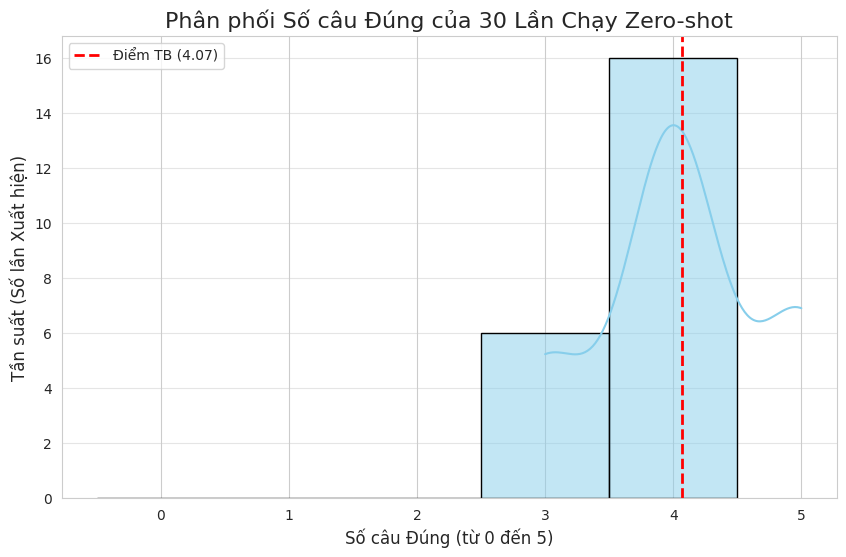

In [95]:
mean_correct_count = sum(LIST_RESULTS_ZERO_SHORT) / NUM_RUNS
mean_accuracy = (mean_correct_count / total_sentences) * 100


print('\n----------------------------------')
print("--- KẾT QUẢ ĐÁNH GIÁ TRUNG BÌNH ---")
print(f'Tổng số lần chạy : {NUM_RUNS}')
print(f'Tổng số câu hỏi : {total_sentences}')
print(f'Số câu đúng TB  : {mean_correct_count:.2f} / {total_sentences}')
print(f'Tỉ lệ đúng TB   : {mean_accuracy:.2f}%')
print('\n----------------------------------')
print(f'Biểu đồ phân phối xác suất đúng của {NUM_RUNS} lần thực nghiệm')
mean_score = np.mean(LIST_RESULTS_ZERO_SHORT)
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
sns.histplot(LIST_RESULTS_ZERO_SHORT, bins=np.arange(0, 6) - 0.5, kde=True, color='skyblue', edgecolor='black', stat='count')
plt.axvline(mean_score, color='red', linestyle='--', linewidth=2, label=f'Điểm TB ({mean_score:.2f})')

plt.title(f'Phân phối Số câu Đúng của {len(LIST_RESULTS_ZERO_SHORT)} Lần Chạy Zero-shot', fontsize=16)
plt.xlabel('Số câu Đúng (từ 0 đến 5)', fontsize=12)
plt.ylabel('Tần suất (Số lần Xuất hiện)', fontsize=12)
plt.xticks(range(0, 6))
plt.legend()
plt.grid(axis='y', alpha=0.5)

plt.show()

## 2.3. Ví dụ 01: Xây dựng 01 `few-shot prompt` cho câu truy vấn trên, hãy tạo 3 samples

In [97]:
def example_01_few_shot(
    input_text: str
) -> str:
    FEW_SHOT_EXAMPLES = (
        "--- BẮT ĐẦU VÍ DỤ ---\n"

        "Câu nói: 'Dự án này là một thành công lớn, vượt mọi kỳ vọng.'\n"
        "Cảm xúc: Tích cực\n\n"
        
        "Câu nói: 'Trải nghiệm giao hàng thật sự tồi tệ và không thể chấp nhận.'\n"
        "Cảm xúc: Tiêu cực\n\n"

        "Câu nói: 'Cuộc họp kéo dài tổng cộng 45 phút và không có quyết định mới nào được đưa ra.'\n"
        "Cảm xúc: Trung lập\n"

        "Câu nói" "Cuộc hợp có nhiều ý tưởng mới, tuy nhiên còn lan man và chưa thật sự hiệu quả về thời gian"
        "Cảm xúc: Trung lập\n"
        "--- KẾT THÚC VÍ DỤ ---\n"
    )
    
    prompt_template = (
        "Bạn là một chuyên gia phân tích cảm xúc (Sentiment Analyst).\n"
        "Nhiệm vụ của bạn là xác định cảm xúc của Câu nói sau và chỉ trả lời bằng một trong ba nhãn sau: \"Tích cực\", \"Trung lập\", hoặc \"Tiêu cực\".\n"
        "Ta định nghĩa"
        "- Tích cực: Tích cực"
        "- Tiêu cực: Tiêu cực"
        "- Trung lập: Hoặc trung lập, hoặc hỗn hợp"
        "Chỉ trả về duy nhất một trong ba nhãn được yêu cầu (không bao gồm dấu \")!\n"

        f"{FEW_SHOT_EXAMPLES}\n"

        f"Câu nói: {input_text}\n"
        "Cảm xúc: "
    )
    
    response = llm.invoke(
        [HumanMessage(content=prompt_template)]
    )
    
    return response.content.strip()

In [85]:
# Ta định nghĩa
# - Tích cực: Tích cực
# - Tiêu cực: Tiêu cực
# - Trung lập: Hoặc trung lập, hoặc hỗn hợp

example_01_prompt = list_of_complex_sentences = [
    "Khóa học này rất tốt, nhưng tài liệu in ấn lại quá tệ và khó đọc.",                     # Hỗn hợp (Positive & Negative)
    "Hợp đồng đã được ký kết, và cả hai bên đều đồng ý với các điều khoản đã nêu.",          # Trung lập
    "Đây là trải nghiệm dịch vụ tồi tệ nhất tôi từng có, tôi sẽ không bao giờ quay lại.",    # Tiêu cực mạnh
    "Tôi đánh giá cao nỗ lực của đội ngũ phát triển, họ đã làm việc không mệt mỏi.",         # Tích cực
    "Chiếc xe đã đến đúng giờ, nhưng màu sắc không hoàn toàn như tôi đã tưởng tượng."        # Trung lập/Hỗn hợp
]
example_01_ans = [
    "Trung lập",
    "Trung lập",
    "Tiêu cực",
    "Tích cực",
    "Trung lập"
]
total_sentences = len(example_01_prompt)

# --- Chạy thử nghiệm ---
NUM_RUNS = 30
LIST_RESULTS_FEW_SHORT = []
for _ in range (NUM_RUNS):
    temp = _ + 1
    if temp % 5 == 0:
        print(f'Tiến trình: {temp}/{NUM_RUNS}')
        
    num_sentence = len(example_01_prompt)
    num_correct = 0
    
    for i, sentence in enumerate(example_01_prompt, 1):
        response = example_01_few_shot(sentence)
    
        icon = '🥲'
        if response == example_01_ans[i-1]:
            icon = '🟢'
            num_correct+=1
        # print(f'{icon} Câu {i}: {response} ')

    LIST_RESULTS_FEW_SHORT.append(num_correct)

Tiến trình: 5/30
Tiến trình: 10/30
Tiến trình: 15/30
Tiến trình: 20/30
Tiến trình: 25/30
Tiến trình: 30/30



----------------------------------
--- KẾT QUẢ ĐÁNH GIÁ TRUNG BÌNH ---
Tổng số lần chạy : 30
Tổng số câu hỏi : 5
Số câu đúng TB  : 3.77 / 5
Tỉ lệ đúng TB   : 75.33%

----------------------------------
Biểu đồ phân phối xác suất đúng của 30 lần thực nghiệm


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


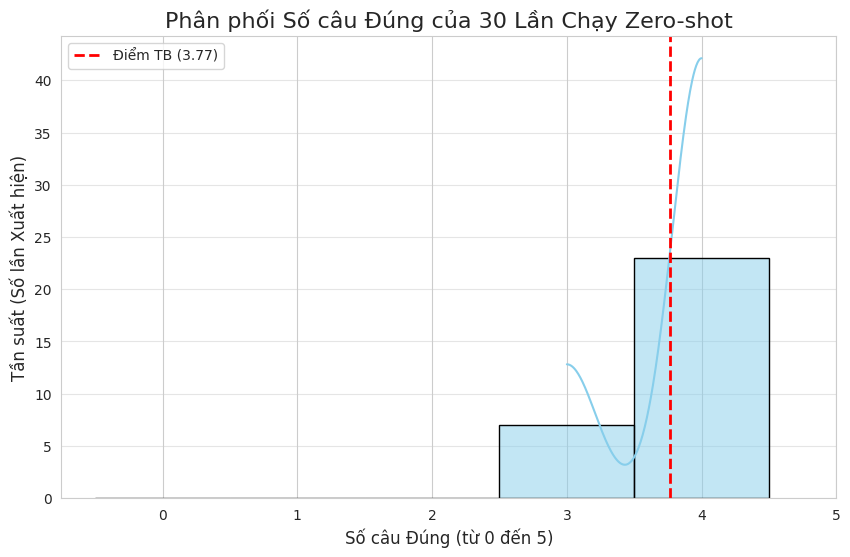

In [98]:
mean_correct_count = sum(LIST_RESULTS_FEW_SHORT) / NUM_RUNS
mean_accuracy = (mean_correct_count / total_sentences) * 100

print('\n----------------------------------')
print("--- KẾT QUẢ ĐÁNH GIÁ TRUNG BÌNH ---")
print(f'Tổng số lần chạy : {NUM_RUNS}')
print(f'Tổng số câu hỏi : {total_sentences}')
print(f'Số câu đúng TB  : {mean_correct_count:.2f} / {total_sentences}')
print(f'Tỉ lệ đúng TB   : {mean_accuracy:.2f}%')
print('\n----------------------------------')
print(f'Biểu đồ phân phối xác suất đúng của {NUM_RUNS} lần thực nghiệm')
mean_score = np.mean(LIST_RESULTS_FEW_SHORT)
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
sns.histplot(LIST_RESULTS_FEW_SHORT, bins=np.arange(0, 6) - 0.5, kde=True, color='skyblue', edgecolor='black', stat='count')
plt.axvline(mean_score, color='red', linestyle='--', linewidth=2, label=f'Điểm TB ({mean_score:.2f})')

plt.title(f'Phân phối Số câu Đúng của {len(LIST_RESULTS_FEW_SHORT)} Lần Chạy Zero-shot', fontsize=16)
plt.xlabel('Số câu Đúng (từ 0 đến 5)', fontsize=12)
plt.ylabel('Tần suất (Số lần Xuất hiện)', fontsize=12)
plt.xticks(range(0, 6))
plt.legend()
plt.grid(axis='y', alpha=0.5)

plt.show()

## > Extention 01: Kiểm định

In [106]:
def compare_two_models(results_a, results_b, name_a="Model A", name_b="Model B", alpha=0.05):
    """
    So sánh hiệu suất giữa 2 mô hình bằng kiểm định thống kê T-test.
    
    Args:
    - results_a (list/array): Danh sách điểm số của Model A.
    - results_b (list/array): Danh sách điểm số của Model B.
    - name_a (str): Tên hiển thị của Model A.
    - name_b (str): Tên hiển thị của Model B.
    - alpha (float): Mức ý nghĩa thống kê (thường là 0.05).
    """

    mean_a = np.mean(results_a)
    mean_b = np.mean(results_b)
    std_a = np.std(results_a)
    std_b = np.std(results_b)
    
    print(f"\n{'='*60}")
    print(f"--- BÁO CÁO SO SÁNH: {name_a} vs {name_b} ---")
    print(f"{'='*60}")
    print(f"{name_a}: TB = {mean_a:.4f} (±{std_a:.4f})")
    print(f"{name_b}: TB = {mean_b:.4f} (±{std_b:.4f})")
    print(f"Chênh lệch: {mean_a - mean_b:.4f}")

    t_stat, p_value = stats.ttest_ind(results_a, results_b, equal_var=False)
    
    print("-" * 40)
    print(f"P-value: {p_value:.5f}")
    
    is_significant = p_value < alpha
    winner = None
    
    if is_significant:
        print(f"✅ KẾT LUẬN: Sự khác biệt CÓ Ý NGHĨA THỐNG KÊ (p < {alpha}).")
        if mean_a > mean_b:
            print(f"🏆 {name_a} thực sự tốt hơn {name_b}.")
            winner = name_a
        else:
            print(f"🏆 {name_b} thực sự tốt hơn {name_a}.")
            winner = name_b
    else:
        print(f"⚠️ KẾT LUẬN: Sự khác biệt KHÔNG CÓ Ý NGHĨA THỐNG KÊ (p >= {alpha}).")
        print("=> Chênh lệch điểm số có thể do ngẫu nhiên. Hai mô hình được xem là NGANG NHAU.")
        winner = "Draw"

    # 3. Vẽ biểu đồ so sánh
    plt.figure(figsize=(10, 6))
    data_plot = [results_a, results_b]
    sns.boxplot(data=data_plot, palette="Set2", showfliers=False) 
    sns.swarmplot(data=data_plot, color=".25", size=6)
    
    plt.xticks([0, 1], [name_a, name_b], fontsize=12)
    plt.ylabel("Điểm số / Số câu đúng", fontsize=12)

    title_status = f"Khác biệt RÕ RỆT (Winner: {winner})" if is_significant else "Khác biệt KHÔNG RÕ RỆT (Ngang nhau)"
    plt.title(f"So sánh Phân phối: {title_status}\n(P-value = {p_value:.4f})", fontsize=14)
    plt.grid(axis='y', alpha=0.3)
    plt.show()

    return {
        "mean_a": mean_a,
        "mean_b": mean_b,
        "p_value": p_value,
        "significant": is_significant,
        "winner": winner
    }


--- BÁO CÁO SO SÁNH: Zero-shot prompting vs Few-shot prompting ---
Zero-shot prompting: TB = 4.0667 (±0.6799)
Few-shot prompting: TB = 3.7667 (±0.4230)
Chênh lệch: 0.3000
----------------------------------------
P-value: 0.04917
✅ KẾT LUẬN: Sự khác biệt CÓ Ý NGHĨA THỐNG KÊ (p < 0.05).
🏆 Zero-shot prompting thực sự tốt hơn Few-shot prompting.


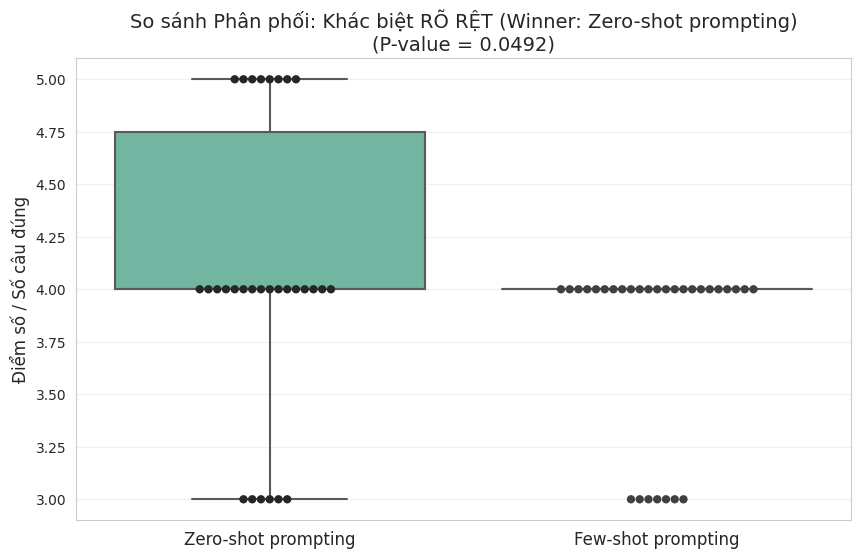

In [107]:
comparison_result = compare_two_models(
    LIST_RESULTS_ZERO_SHORT, 
    LIST_RESULTS_FEW_SHORT, 
    name_a="Zero-shot prompting", 
    name_b="Few-shot prompting", 
    alpha=0.05
)

## 2.4. Ví dụ 02: Few-shot Prompting kết hợp Chain-of-thought

In [111]:
def example_02_few_shot_cot(
    input_text: str
) -> str:
    
    PROMPT_TEMPLATE = (
        "Bạn là một chuyên gia giải quyết vấn đề. Nhiệm vụ của bạn là giải quyết bài toán thời gian.\n"
        "QUY TẮC ĐỊNH DẠNG: Chỉ in ra CÂU TRẢ LỜI CUỐI CÙNG theo đúng định dạng sau:\n"
        "  - Nếu phút kết thúc bằng 0: Nam xem xong lúc H giờ\n"
        "  - Nếu phút kết thúc khác 0: Nam xem xong lúc H giờ M phút\n"
        "  - KHÔNG thêm số 0 đứng trước (ví dụ: 9 giờ 3 phút).\n"
        "--- VÍ DỤ (Few-shot CoT) ---\n"
        
        # --- Ví dụ 01 ---
        "Câu hỏi: Một bộ phim dài 150 phút. Nam bắt đầu xem lúc 14:40 và nghỉ giải lao 20 phút ở giữa phim. Hỏi Nam xem xong lúc mấy giờ?\n"
        "Suy luận:\n"
        "1. Tổng thời gian cần thiết (thời gian phim + giải lao) là: 150 phút + 20 phút = 170 phút.\n"
        "2. Chuyển tổng thời gian thành giờ và phút: 170 phút = 2 giờ 50 phút.\n"
        "3. Thời gian bắt đầu: 14:40.\n"
        "4. Tính giờ kết thúc: 14 giờ 40 phút + 2 giờ 50 phút.\n"
        "   - Giờ: 14 + 2 = 16 giờ.\n"
        "   - Phút: 40 + 50 = 90 phút.\n"
        "5. Điều chỉnh phút: 90 phút = 1 giờ 30 phút.\n"
        "6. Giờ kết thúc cuối cùng: 16 giờ + 1 giờ 30 phút = 17 giờ 30 phút.\n"
        "Câu trả lời: Nam xem xong lúc 17 giờ 30 phút\n\n"
        
        # --- Ví dụ 02 ---
        "Câu hỏi: Một bộ phim dài 120 phút. Nam bắt đầu xem lúc 8:15 và nghỉ giải lao 15 phút. Hỏi Nam xem xong lúc mấy giờ?\n"
        "Suy luận:\n"
        "1. Tổng thời gian cần thiết (thời gian phim + giải lao) là: 120 phút + 15 phút = 135 phút.\n"
        "2. Chuyển tổng thời gian thành giờ và phút: 135 phút = 2 giờ 15 phút.\n"
        "3. Thời gian bắt đầu: 8:15.\n"
        "4. Tính giờ kết thúc: 8 giờ 15 phút + 2 giờ 15 phút.\n"
        "   - Giờ: 8 + 2 = 10 giờ.\n"
        "   - Phút: 15 + 15 = 30 phút.\n"
        "5. Điều chỉnh phút: 30 phút + 30 phút = 60 phút = 1 giờ 0 phút. (Sai) 15 + 15 = 30 phút. (Đúng)\n"
        "6. Giờ kết thúc cuối cùng: 10 giờ 30 phút. (Sai)\n"
        "7. THỬ LẠI: (120 + 15) phút = 135 phút. 8 giờ 15 phút + 135 phút. 15 phút + 135 phút = 150 phút. 150 phút = 2 giờ 30 phút. 8 giờ + 2 giờ 30 phút = 10 giờ 30 phút. (Sai)\n"
        "SỬA VÍ DỤ ĐỂ KẾT THÚC BẰNG 0:\n"
        "Câu hỏi: Một bộ phim dài 105 phút. Nam bắt đầu xem lúc 9:45 và nghỉ giải lao 30 phút. Hỏi Nam xem xong lúc mấy giờ?\n"
        "Suy luận:\n"
        "1. Tổng thời gian: 105 + 30 = 135 phút.\n"
        "2. Chuyển đổi: 135 phút = 2 giờ 15 phút.\n"
        "3. Thời gian bắt đầu: 9:45.\n"
        "4. Tính giờ kết thúc: 9:45 + 2:15. Giờ: 9 + 2 = 11. Phút: 45 + 15 = 60 phút = 1 giờ 0 phút.\n"
        "5. Giờ kết thúc cuối cùng: 11 giờ + 1 giờ = 12 giờ 0 phút.\n"
        "Câu trả lời: Nam xem xong lúc 12 giờ\n"

        "--- BẮT ĐẦU CÂU HỎI MỚI ---\n"
        f"Câu hỏi: {input_text}\n"
        "Suy luận: "
    )
    response = llm.invoke([HumanMessage(content=PROMPT_TEMPLATE)])
    full_output = response.content.strip()
    
    try:
        final_answer = next(
            line for line in full_output.split('\n') if "Nam xem xong lúc" in line
        )
        return final_answer
    except StopIteration:
        return f"Lỗi định dạng: {full_output}"

In [118]:
example_02_prompt = [
    "Một bộ phim dài 150 phút. Nam bắt đầu xem lúc 19:20 và nghỉ giải lao 10 phút ở giữa phim. Nam xem xong lúc mấy giờ?",
    "Một bộ phim dài 95 phút. Nam bắt đầu xem lúc 7:50 và không nghỉ giải lao. Nam xem xong lúc mấy giờ?"
]

example_02_ans = [
    "Nam xem xong lúc 22 giờ",
    "Nam xem xong lúc 9 giờ 25 phút"
]

In [128]:
for i, sentence in enumerate(example_02_prompt, 1):
    response = example_02_few_shot_cot(sentence)
    print(f'Câu {i}: {response} ')

Câu 1: Câu trả lời: Nam xem xong lúc 22 giờ
Câu 2: Câu trả lời: Nam xem xong lúc 9 giờ 25 phút
